In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import spotipy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import DBSCAN

In [144]:
df=pd.read_csv('tracks_with_popularity.csv')
X_test=pd.read_csv('test_tracks_with_popularity (2).csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title,Id,popularity
0,0.896,0.691,1,-7.403,1,0.369,0.01180,0.000,0.0883,0.6650,...,https://api.spotify.com/v1/tracks/1lKQIxQDnLKo...,https://api.spotify.com/v1/audio-analysis/1lKQ...,152398,4,Underground Rap,First Day Out,NaN,NaN,6863,0
1,0.432,0.962,2,-5.834,1,0.130,0.00193,0.162,0.6300,0.1240,...,https://api.spotify.com/v1/tracks/6xyHjM4VecIR...,https://api.spotify.com/v1/audio-analysis/6xyH...,219085,4,trance,NaN,8997.0,Uplifting | Trance,30452,8
2,0.686,0.692,0,-5.573,0,0.323,0.48200,0.000,0.1690,0.6490,...,https://api.spotify.com/v1/tracks/1rZvU5sb2E8L...,https://api.spotify.com/v1/audio-analysis/1rZv...,269357,3,Underground Rap,Funky Ho'$,NaN,NaN,8111,48
3,0.441,0.891,7,-2.873,0,0.037,0.01770,0.815,0.1840,0.0353,...,https://api.spotify.com/v1/tracks/1TDjiNBekgMI...,https://api.spotify.com/v1/audio-analysis/1TDj...,319851,4,dnb,NaN,15264.0,Liquid Drum & Bass,36665,24
4,0.376,0.876,4,-2.695,0,0.101,0.03450,0.000,0.1250,0.2500,...,https://api.spotify.com/v1/tracks/79fspqGOIP7F...,https://api.spotify.com/v1/audio-analysis/79fs...,222442,4,Dark Trap,Miss U,NaN,NaN,4428,25


Analizamos las columnas y eliminamos las que no nos interesan

In [145]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title', 'Id',
       'popularity'],
      dtype='object')

In [146]:
#Creamos el data frame de la respuesta antes de eliminar la columna Id
resultados = pd.DataFrame({"Id": X_test["Id"]})

In [147]:
resultados

,Id
0,7625
1,10059
2,8322
3,22036
4,12324
...,...
8456,31119
8457,39521
8458,3914
8459,16752


In [148]:
df=df.drop(columns=['track_href','analysis_url','song_name','Unnamed: 0','type','id','Id','time_signature','title','uri'])
X_test=X_test.drop(columns=['track_href','analysis_url','song_name','Unnamed: 0','type','id','Id','time_signature','title','uri'])

Vemos si hay nulos

In [149]:
null_percentage = df.isnull().mean() * 100
# Mostrar el porcentaje
print(null_percentage)

danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
genre               0.0
popularity          0.0
dtype: float64


Cambiamos los strings de los géneros por números

In [150]:
genre_to_num = {
    'Dark Trap': 0,
    'Underground Rap': 1,
    'Trap Metal': 2,
    'Emo': 3,
    'Rap': 4,
    'RnB': 5,
    'Pop': 6,
    'Hiphop': 7,
    'techhouse': 8,
    'techno': 9,
    'trance': 10,
    'psytrance': 11,
    'trap': 12,
    'dnb': 13,
    'hardstyle': 14
}

df['genre'] = df['genre'].map(genre_to_num)

# Verificar los cambios
print(df.head())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.896   0.691    1    -7.403     1        0.369       0.01180   
1         0.432   0.962    2    -5.834     1        0.130       0.00193   
2         0.686   0.692    0    -5.573     0        0.323       0.48200   
3         0.441   0.891    7    -2.873     0        0.037       0.01770   
4         0.376   0.876    4    -2.695     0        0.101       0.03450   

   instrumentalness  liveness  valence    tempo  duration_ms  genre  \
0             0.000    0.0883   0.6650  189.880       152398      1   
1             0.162    0.6300   0.1240  138.010       219085     10   
2             0.000    0.1690   0.6490  173.780       269357      1   
3             0.815    0.1840   0.0353  175.007       319851     13   
4             0.000    0.1250   0.2500  202.082       222442      0   

   popularity  
0           0  
1           8  
2          48  
3          24  
4          25  


In [151]:
print(f"Valores únicos en genre: {df['genre'].unique()}")

Valores únicos en genre: [ 1 10 13  0  5  7 12  2  6 14  3  4  8 11  9]


In [152]:
# Cambio duración de ms a segundos
df['duration_minutes'] = df['duration_ms'] / 60000
df=df.drop(columns=['duration_ms'])
X_test['duration_minutes'] = X_test['duration_ms'] / 60000
X_test=X_test.drop(columns=['duration_ms'])

In [153]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                 int64
popularity            int64
duration_minutes    float64
dtype: object

# Clustering

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, DBSCAN


# Separar variables numéricas y categóricas
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features=numerical_features.drop('genre')
# Normalizar datos numéricos
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Convertir categóricas a números para KPrototypes
for col in categorical_features:
    df[col] = df[col].astype('category').cat.codes

# Convertir a matriz numpy
data_matrix = df.to_numpy()

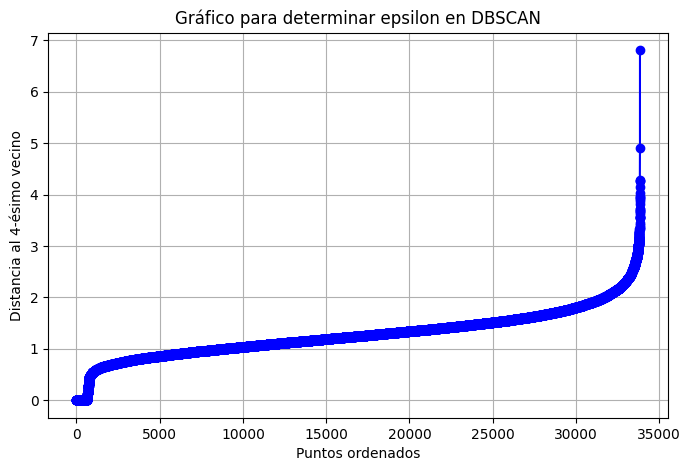

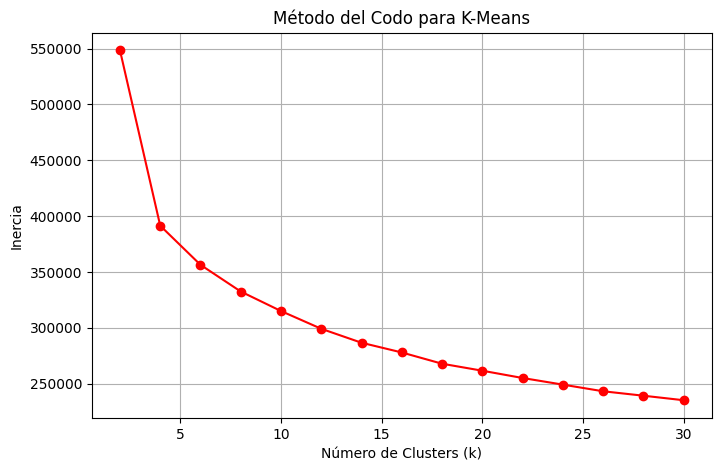

In [156]:


# ===== Paso 1: Encontrar epsilon óptimo para DBSCAN =====
def find_optimal_epsilon(data, k=4):
    """Calcula las distancias de los k-vecinos y grafica el 'codo' para encontrar el mejor epsilon."""
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    
    # Tomamos la distancia al k-ésimo vecino
    distances = np.sort(distances[:, k-1])  
    
    # Graficar la curva de codo
    plt.figure(figsize=(8, 5))
    plt.plot(distances, marker='o', linestyle='-', color='b')
    plt.xlabel("Puntos ordenados")
    plt.ylabel(f"Distancia al {k}-ésimo vecino")
    plt.title("Gráfico para determinar epsilon en DBSCAN")
    plt.grid(True)
    plt.show()

# Ejecutar la función para encontrar epsilon
find_optimal_epsilon(df[numerical_features], k=4)

# ===== Método del codo para K-Means =====
def elbow_method_kmeans(data, max_clusters=15):
    """Calcula la inercia para distintos k y grafica el 'codo'."""
    inertias = []
    cluster_range = range(2, max_clusters+1, 2)  # Se evalúan solo valores pares para acelerar

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)  # Inercia del modelo

    # Graficar el Método del Codo
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertias, marker='o', linestyle='-', color='r')
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("Inercia")
    plt.title("Método del Codo para K-Means")
    plt.grid(True)
    plt.show()

# Ejecutar la función para encontrar k óptimo
elbow_method_kmeans(data_matrix, max_clusters=30)





=== MÉTRICAS DE K-MEANS ===
Silhouette Score: 0.1372
Davies-Bouldin Index: 2.0759
Calinski-Harabasz Index: 8730.7283

=== MÉTRICAS DE DBSCAN ===
Silhouette Score: -0.0007
Davies-Bouldin Index: 1.1657
Calinski-Harabasz Index: 273.6528


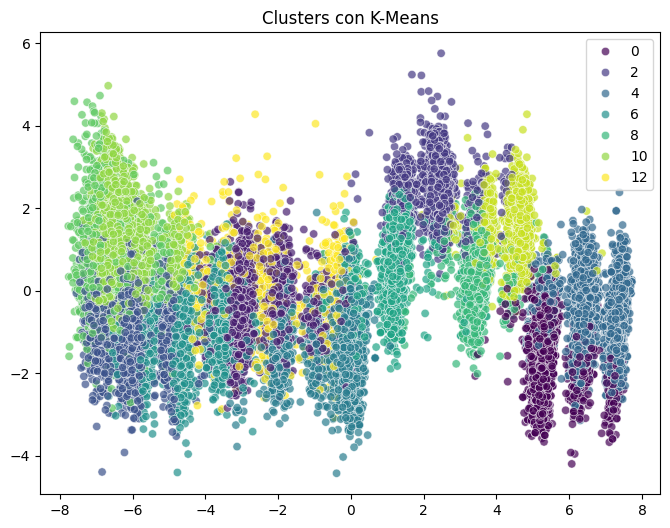

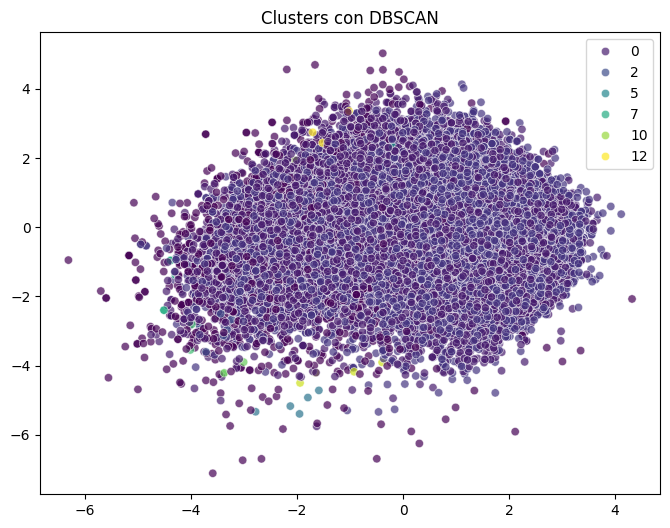

In [172]:
# ===== Aplicar K-Means =====
kmeans = KMeans(n_clusters=13, init='k-means++', random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(data_matrix)

# ===== Aplicar DBSCAN =====
dbscan = DBSCAN(eps=2, min_samples=5)
clusters_dbscan = dbscan.fit_predict(df[numerical_features])

# ===== Evaluación de métricas =====
valid_dbscan = clusters_dbscan != -1  # DBSCAN genera -1 para outliers

print("=== MÉTRICAS DE K-MEANS ===")
print(f"Silhouette Score: {silhouette_score(data_matrix, clusters_kmeans):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(data_matrix, clusters_kmeans):.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(data_matrix, clusters_kmeans):.4f}")

if valid_dbscan.sum() > 1:  # Evitar error si DBSCAN detecta solo ruido
    print("\n=== MÉTRICAS DE DBSCAN ===")
    print(f"Silhouette Score: {silhouette_score(df[numerical_features][valid_dbscan], clusters_dbscan[valid_dbscan]):.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(df[numerical_features][valid_dbscan], clusters_dbscan[valid_dbscan]):.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_score(df[numerical_features][valid_dbscan], clusters_dbscan[valid_dbscan]):.4f}")
else:
    print("\nDBSCAN detectó solo ruido, sin métricas disponibles.")

# ===== Visualización =====
def plot_clusters(data, labels, title):
    """Visualiza los clusters con PCA."""
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(data)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=labels, palette="viridis", alpha=0.7)
    plt.title(title)
    plt.legend()
    plt.show()

plot_clusters(data_matrix, clusters_kmeans, "Clusters con K-Means")
plot_clusters(df[numerical_features], clusters_dbscan, "Clusters con DBSCAN")

In [164]:
df['kmeans_cluster'] = clusters_kmeans
df['dbscan_cluster'] = clusters_dbscan

# Comparar los clusters con los géneros reales
print(df[['genre', 'kmeans_cluster', 'dbscan_cluster']].sample(10))

       genre  kmeans_cluster  dbscan_cluster
1354      11              11               1
13937      8               7               1
30894      7               1               1
7765       1               3               1
7316      11              11               0
11284      1              10               1
2417      11              11               0
25898      1              10               1
32250     14               0               0
5571      10              11               0


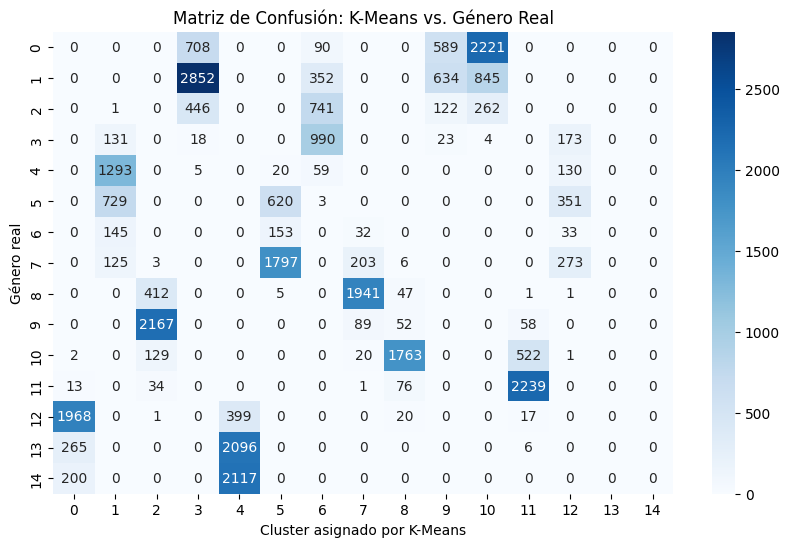

In [165]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matriz de confusión entre los géneros reales y los clusters de K-Means
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(df['genre'], df['kmeans_cluster']), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Cluster asignado por K-Means')
plt.ylabel('Género real')
plt.title('Matriz de Confusión: K-Means vs. Género Real')
plt.show()

In [169]:
from sklearn.metrics import adjusted_rand_score

ari_kmeans = adjusted_rand_score(df['genre'], df['kmeans_cluster'])
ari_dbscan = adjusted_rand_score(df['genre'], df['dbscan_cluster'])

print(f"ARI K-Means: {ari_kmeans:.4f}")
print(f"ARI DBSCAN: {ari_dbscan:.4f}")

ARI K-Means: 0.5218
ARI DBSCAN: 0.0035


## Conclusión 

Analizando el silhouette-score podemos ver que aunque en el caso de K-Means no tenga un valor cercano a 1, puede detectar clusters aunque haya muchoas muestras que se encuentran en la frontera. En el caso de DBScan, nos dice que existe solapamiento y que no es capaz de describir bien los clusters.

Las gráficas nos muestran como K-Means si es capaz de generar ciertos clusters aunque no son claros y haya puntos que se encuentren en la frontera entre dos clusters. Por otro lado, el gráfico de DBScan no nos muestra nada con claridad. Además, en la matriz de confusión vemos que varios de los clusters generados por k-means coinciden en cierta medida con los géneros que tiene este modelo como variable objetivo.

Por último, utilizando el adjusted_rand_score, confirmamos que en el caso de k-means si que hay parecido entre los clusters reales de los géneros (1 es la mayor similitud), mientras que DBScan no posee prácticamente ninguna similitud

# Dimesionalidad

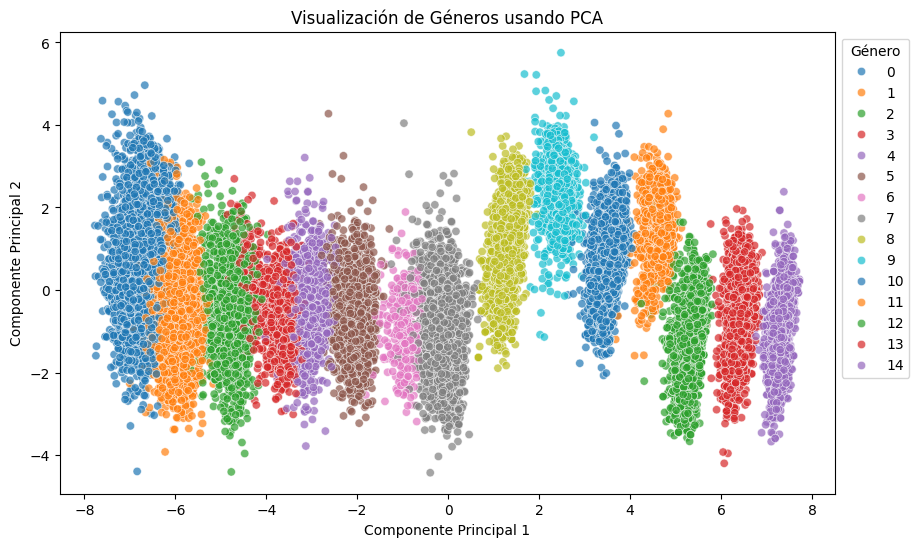

In [158]:
# Reducir a 2D con PCA
pca = PCA(n_components=2)
reduced_pca = pca.fit_transform(data_matrix)

# Graficar los géneros en 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_pca[:, 0], y=reduced_pca[:, 1], hue=df['genre'], palette="tab10", alpha=0.7)
plt.title("Visualización de Géneros usando PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Género", bbox_to_anchor=(1, 1))
plt.show()

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


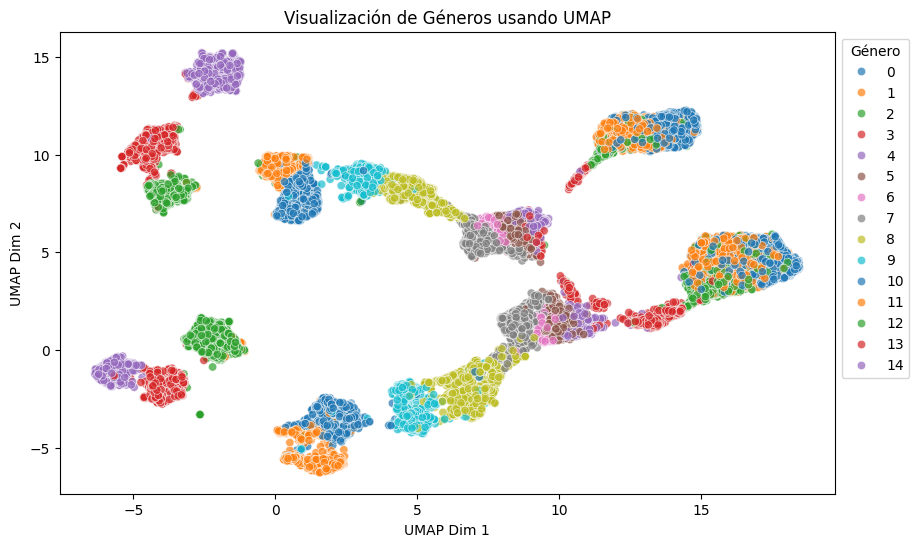

In [170]:
import umap.umap_ as umap
# Reducir a 2D con UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
reduced_umap = umap_reducer.fit_transform(data_matrix)

# Graficar los géneros en 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_umap[:, 0], y=reduced_umap[:, 1], hue=df['genre'], palette="tab10", alpha=0.7)
plt.title("Visualización de Géneros usando UMAP")
plt.xlabel("UMAP Dim 1")
plt.ylabel("UMAP Dim 2")
plt.legend(title="Género", bbox_to_anchor=(1, 1))
plt.show()

## Conclusión

Al aplicar dimensionalidad para intentar ver la complejidad de nuestro problema y el como se agrupa la variable objetivo vemos dos gráficos muy distintos de dos métodos utilizados.

En PCA, vemos que hay claros grupos y aunque algunas muestras se encuentren en la frontera con otro grupo o parezcan outliers, vemos que hay agrupaciones claras.

Al fijarnos en el gráfico de UMAP, obtenemos nuevas conclusiones. La primera es que los clusters se comportan de formas distintas, como por ejemplo el 13, que lo podemos encontrar en varios puntos distintos del gráfico en vez de agrupado en uno solo (una de sus implicaciones podría ser: puede haber canciones de ese género a 90, 120 y 160 bpm en vez de un rango como 110-120bpm). Por otro lado, vemos distintos géneros muy agrupados o muestras sueltas ubicadas en clusters distintos al que tienen asignado. 

Tras todo lo anterior, podemos concluir que se trata de un problema en el que seremos capaces de distinguir algunos géneros de forma relativamente clara pero tendremos problemas con otros cuyos limítes no están muy claros o son parecidos.

=== MÉTRICAS DE K-PROTOTYPES ===
Silhouette Score: -0.0030
Davies-Bouldin Index: 187.8145
Calinski-Harabasz Index: 0.8323

=== MÉTRICAS DE DBSCAN ===
Silhouette Score: 0.8898
Davies-Bouldin Index: 0.2277
Calinski-Harabasz Index: 1912.0052


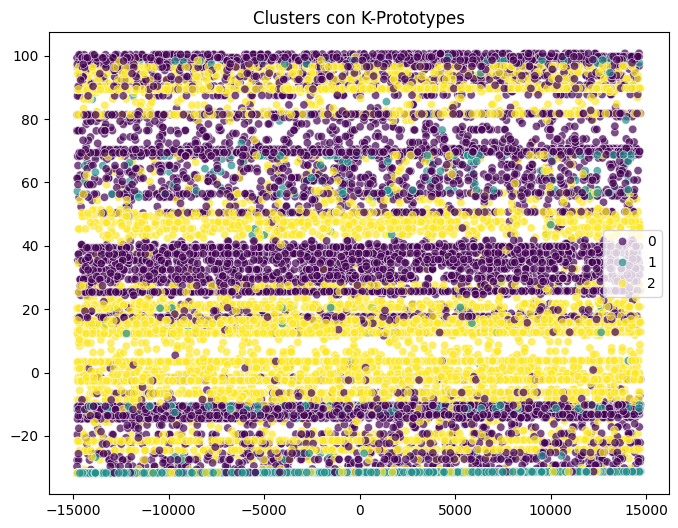

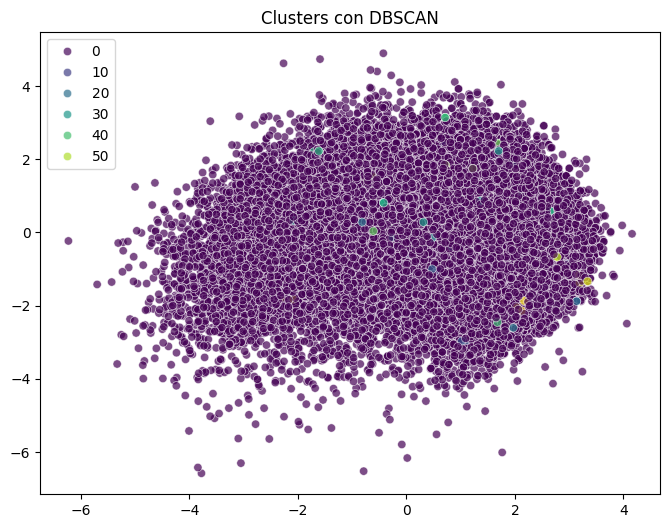

In [ ]:

# # Separar variables numéricas y categóricas
# numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = df.select_dtypes(include=['object']).columns

# # Normalizar datos numéricos
# scaler = StandardScaler()
# df[numerical_features] = scaler.fit_transform(df[numerical_features])

# # Convertir categóricas a números para KPrototypes
# for col in categorical_features:
#     df[col] = df[col].astype('category').cat.codes

# # Convertir a matriz numpy
# data_matrix = df.to_numpy()

# # ===== Paso 2: Encontrar el número óptimo de clusters en K-Prototypes =====
# def elbow_method_kprototypes(data, max_clusters=6):
#     """Calcula el costo de inercia para distintos k y grafica el 'codo'."""
#     costs = []
#     cluster_range = range(2, max_clusters+1)

#     for k in cluster_range:
#         kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42, n_jobs=-1)
#         kproto.fit_predict(data, categorical=[df.columns.get_loc(col) for col in categorical_features])
#         costs.append(kproto.cost_)  # Costo de inercia

#     # Graficar el Método del Codo
#     plt.figure(figsize=(8, 5))
#     plt.plot(cluster_range, costs, marker='o', linestyle='-', color='r')
#     plt.xlabel("Número de Clusters (k)")
#     plt.ylabel("Costo de inercia")
#     plt.title("Método del Codo para K-Prototypes")
#     plt.grid(True)
#     plt.show()

# # Ejecutar la función para encontrar k óptimo
# elbow_method_kprototypes(data_matrix, max_clusters=6)

# # ===== Aplicar K-Prototypes =====
# kproto = KPrototypes(n_clusters=3, init='Huang', random_state=42)
# clusters_kproto = kproto.fit_predict(data_matrix, categorical=[df.columns.get_loc(col) for col in categorical_features])

# # ===== Aplicar DBSCAN =====
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# clusters_dbscan = dbscan.fit_predict(df[numerical_features])

# # ===== Evaluación de métricas =====
# # DBSCAN genera -1 para outliers, los eliminamos de métricas de clusterización
# valid_dbscan = clusters_dbscan != -1  

# print("=== MÉTRICAS DE K-PROTOTYPES ===")
# print(f"Silhouette Score: {silhouette_score(data_matrix, clusters_kproto):.4f}")
# print(f"Davies-Bouldin Index: {davies_bouldin_score(data_matrix, clusters_kproto):.4f}")
# print(f"Calinski-Harabasz Index: {calinski_harabasz_score(data_matrix, clusters_kproto):.4f}")

# if valid_dbscan.sum() > 1:  # Evitar error si DBSCAN detecta solo ruido
#     print("\n=== MÉTRICAS DE DBSCAN ===")
#     print(f"Silhouette Score: {silhouette_score(df[numerical_features][valid_dbscan], clusters_dbscan[valid_dbscan]):.4f}")
#     print(f"Davies-Bouldin Index: {davies_bouldin_score(df[numerical_features][valid_dbscan], clusters_dbscan[valid_dbscan]):.4f}")
#     print(f"Calinski-Harabasz Index: {calinski_harabasz_score(df[numerical_features][valid_dbscan], clusters_dbscan[valid_dbscan]):.4f}")
# else:
#     print("\nDBSCAN detectó solo ruido, sin métricas disponibles.")

# # ===== Visualización =====
# def plot_clusters(data, labels, title):
#     """Visualiza los clusters con PCA."""
#     pca = PCA(n_components=2)
#     reduced = pca.fit_transform(data)
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=labels, palette="viridis", alpha=0.7)
#     plt.title(title)
#     plt.legend()
#     plt.show()

# plot_clusters(data_matrix, clusters_kproto, "Clusters con K-Prototypes")
# plot_clusters(df[numerical_features], clusters_dbscan, "Clusters con DBSCAN")